# **Gamma And Hadron Rays Classification**

-------------

## **Objective**

- Differentiate between Hadron & Gamma Rays based on all the features

## **Data Source**

**MAGIC Gamma Telescope Dataset**

- **Donated on:** April 30, 2007
- **Dataset Characteristics:** Multivariate
- **Subject Area:** Physics and Chemistry
- **Associated Tasks:** Classification
- **Feature Type:** Real
- **Instances:** 19,020
- **Features:** 10
- **Missing Values:** No

**Dataset Description**
---------------------

The MAGIC Gamma Telescope dataset is a Monte Carlo (MC) simulation of high energy gamma particles in an atmospheric Cherenkov telescope. The data simulates the registration of gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique.

The dataset contains 19,020 instances and 10 features, all of which are real-valued and continuous. There are no missing values in this dataset.

**Feature Variables**
----------------

| Variable Name | Role   | Type   | Description                                                                   | Units | Missing Values |
|---------------|--------|--------|-------------------------------------------------------------------------------|--------|---------------|
| fLength       | Feature| Continuous| Major axis of ellipse                                                         | mm    | no            |
| fWidth        | Feature| Continuous| Minor axis of ellipse                                                          | mm    | no            |
| fSize         | Feature| Continuous| 10-log of sum of content of all pixels                                          | phot  | no            |
| fConc         | Feature| Continuous| Ratio of sum of two highest pixels over fSize                                   |        | no            |
| fConc1        | Feature| Continuous| Ratio of highest pixel over fSize                                                |        | no            |
| fAsym         | Feature| Continuous| Distance from highest pixel to center, projected onto major axis                |        | no            |
| fM3Long       | Feature| Continuous| 3rd root of third moment along major axis                                      | mm    | no            |
| fM3Trans      | Feature| Continuous| 3rd root of third moment along minor axis                                      | mm    | no            |
| fAlpha        | Feature| Continuous| Angle of major axis with vector to origin                                      | deg   | no            |
| fDist         | Feature| Continuous| Distance from origin to center of ellipse                                      | mm    | no            |

These features are derived from the image parameters of the shower, which can be used for discrimination between signal (gamma) and background (hadronic) events.

**Additional Information**
---------------------

The data was generated using the CORSIKA Monte Carlo program, which simulates extensive air showers. The program was run with parameters that allow observation of events with energies down to below 50 GeV.


## **Import Library**

In [38]:
# Basic Import
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# SK-Learn Imports
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split




# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## **Import Data**

In [39]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('https://github.com/pri-cd/Internship-Python-Analytics/raw/main/Final-Projects/DS/magic04.data', names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

#### **Other ways of doing the same thing as below**
- `df['class'] = df['class'].map({'g': 1, 'b': 0}).astype(int)`
- `df['class'] = df['class'].replace({'g': 1, 'b': 0}).astype(int)`
- `df['class'] = df['class'].apply(lambda x: 1 if x == 'g' else 0).astype(int)`

| Condition | Value |
|----------|----------|
| True  | `g`  |
| False  | `h`  |


In [40]:
df['class'] = (df['class'] == 'g').astype(int)

## **Describe Data**

In [41]:
df.drop('class', axis=1).describe()

fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000  
mean      -4.331745     10.545545      0.249726     27.645707    193.818026  
std       59.206062     51.000118     20.827439     26.103621     74.731787  
min     -457.916100   -331.780000   -205.894700      0.000000      1.282600  
25%      -20.586550    -12.842775    -10.849375      5.547925    142.492250  
50%        4.013050     15.314100      0.666200     17.679500    191.851450  
75%       24.063700     35.837800     10.946425     45.883550    240.563825  
max      575.240700    238.321000    179.851000     90.000000    495.561000

## **Data Visualization**

#### **Explaination**
- `df[df['class'] == 1]` Gives all the Features Where Class is 1
- And, Vice Versa.

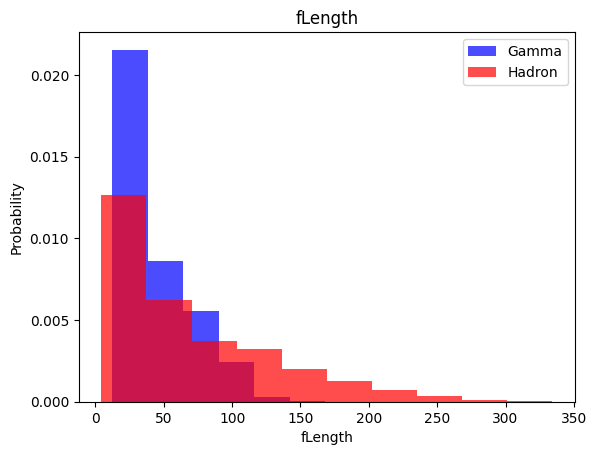

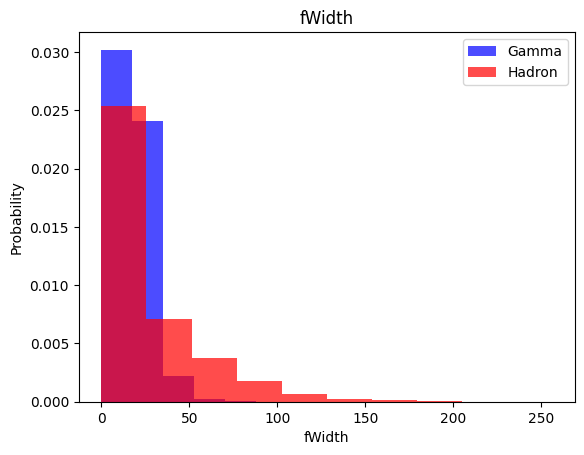

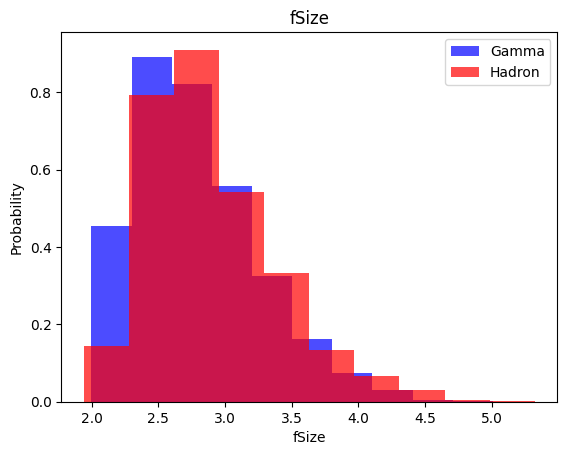

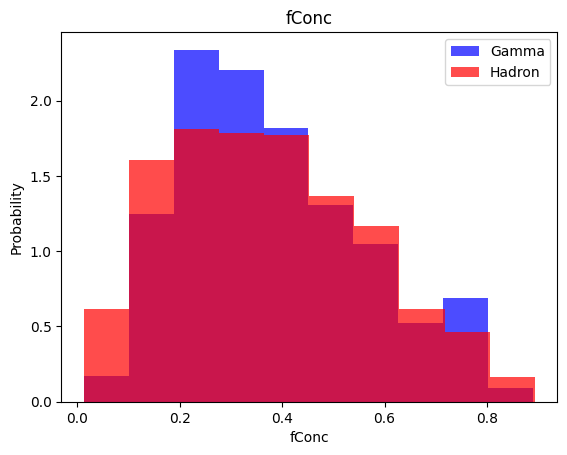

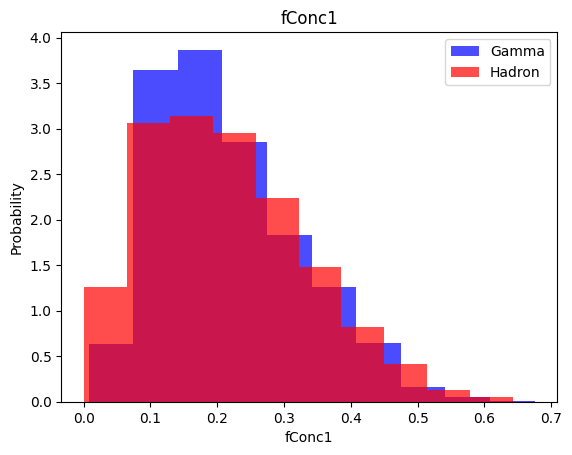

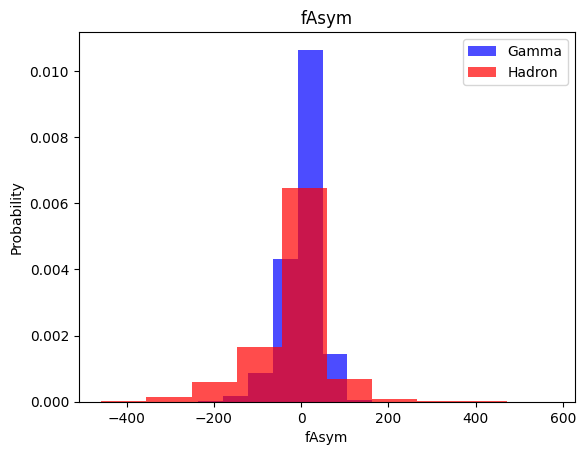

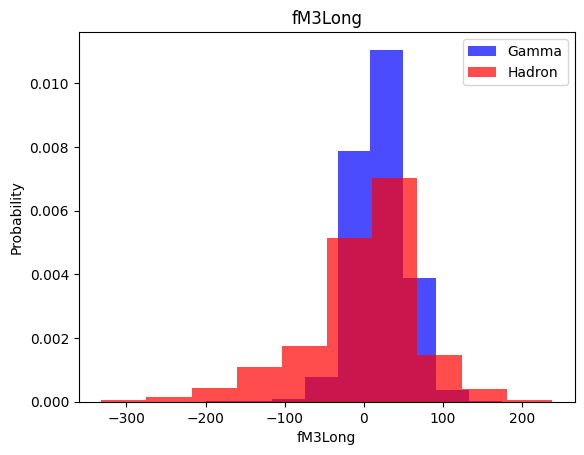

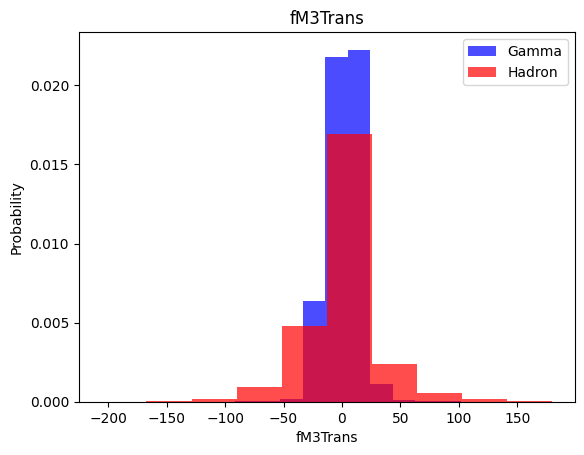

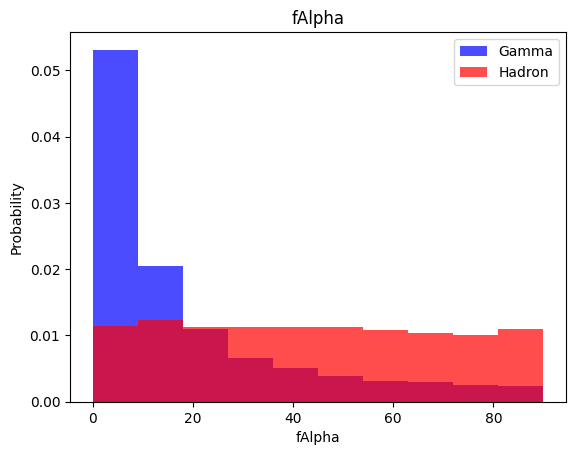

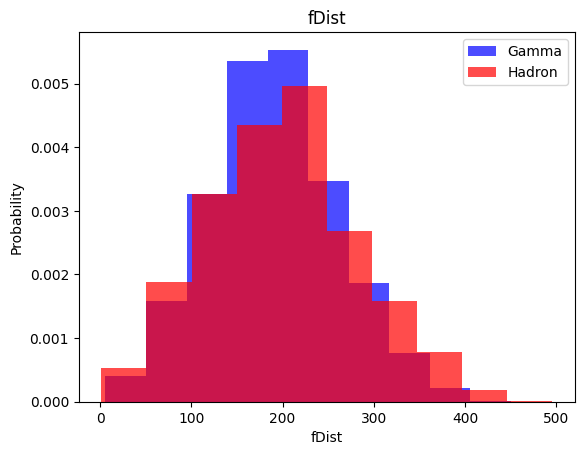

In [42]:
for label in cols[:-1]:
  plt.hist(df[df['class'] == 1][label], color='blue', label='Gamma', density=True, alpha=0.7)
  plt.hist(df[df['class'] == 0][label], color='red', label='Hadron', density=True, alpha=0.7)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

## **Data Preprocessing**

In [43]:
def scaleDs(dataframe, OverSample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if OverSample is True:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

## **Train Test Split**
- About **60%** of Dataset Will Go to Training. (`int(0.6 * len(df))`)
- From **60%-80%** will go to Validation. (`[int(0.6 * len(df)), int(0.8 * len(df))]`)
- And, Everything **After 80%** is Testing dataset.

In [44]:
train, ValTest = train_test_split(df, test_size=0.4, random_state=42)
valid, test = train_test_split(ValTest, test_size=0.5, random_state=42)

#### **Issue**
- There's a massive difference between the numbers of Hedron and Gamma counterparts.
- So, we've to oversample the Hedron part- To balance the model.

In [45]:
print(f"The Length of Train(Gamma): {len(train[train['class'] == 1])}")
print(f"The Length of Train(Hedron): {len(train[train['class'] == 0])}")

The Length of Train(Gamma): 7396
The Length of Train(Hedron): 4016


In [46]:
train, xTrain, yTrain = scaleDs(train, True)
valid, xValid, yValid = scaleDs(valid, False)
test, xTest, yTest = scaleDs(test, False)


print(f"Now its' okay- Since:")
print(f"Gamma: {sum(yTrain == 1)}")
print(f"Hedron: {sum(yTrain == 0)}")

Now its' okay- Since:
Gamma: 7396
Hedron: 7396


# **K-Nearest Neighbors (KNN) Algorithm**

The K-Nearest Neighbors (KNN) algorithm is a simple and widely used machine learning algorithm for classification and regression tasks. It is a non-parametric method, which means it does not make any assumptions about the underlying data distribution.

## **How KNN Works-?**
---------------

### **Distance Metric**

The KNN algorithm uses a **distance metric** to measure the similarity between data points. The most common distance metric is the Euclidean distance, which is calculated as:

$d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$

where $x$ and $y$ are two data points, and $n$ is the number of features.

### **Nearest Neighbors**

For a given data point, the KNN algorithm finds the $K$ nearest neighbors based on the chosen distance metric. The value of $K$ is a hyperparameter that needs to be tuned.

### **Classification**

For a classification task, the KNN algorithm assigns the data point to the class that is most common among its $K$ nearest neighbors. The class with the highest number of votes is the predicted class.

### **Regression**

For a regression task, the KNN algorithm predicts the target value as the average of the target values of the $K$ nearest neighbors.

## Choosing the Optimal Value of K
-------------------------------

The choice of $K$ is crucial in the KNN algorithm. A small value of $K$ can lead to overfitting, while a large value of $K$ can lead to underfitting. The optimal value of $K$ can be determined using techniques such as cross-validation.

## Handling Noisy Data
--------------------

KNN is sensitive to noisy data, which can negatively impact its performance. Techniques such as data preprocessing and feature selection can be used to handle noisy data.

## Real-World Applications
-------------------------

KNN has a wide range of applications in real-world problems, including:

* Image classification
* Text classification
* Recommendation systems
* Time series forecasting

## Example Use Case
-----------------

Suppose we have a dataset of images of handwritten digits, and we want to classify a new image as one of the digits. We can use the KNN algorithm to find the $K$ nearest neighbors to the new image, and then assign the class label based on the majority vote.

## **Modeling**

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

KNNModel = KNeighborsClassifier(n_neighbors=5)
KNNModel.fit(xTrain, yTrain)

KNeighborsClassifier()

# **Naive Bayes Theorem**

The Naive Bayes theorem is a classification technique based on **Bayes' Theorem**, which assumes that the features used to predict the class label are **independent** given the class label. This method is particularly useful for large datasets and is commonly used in **text classification**, such as **spam detection**.

## **Bayes' Theorem**

The theorem is defined as:

$$ P(A | B) = \frac{P(B | A) \cdot P(A)}{P(B)} $$

Where:
- \( P(A | B) \) = Posterior probability (probability of class A given features B)
- \( P(B | A) \) = Likelihood (probability of features B given class A)
- \( P(A) \) = Prior probability (probability of class A)
- \( P(B) \) = Evidence (probability of features B)

## **Naive Assumption**

The "naive" aspect of the algorithm refers to the assumption that all features are independent from each other. This simplifies the computation, allowing us to express the likelihood as:

$$ P(B | A) = P(x_1 | A) \cdot P(x_2 | A) \cdot ... \cdot P(x_n | A) $$

Where \( x_1, x_2, ..., x_n \) are the features.

## **Example**

Suppose we want to classify an email as "spam" or "not spam." We can use the frequency of certain words as features.

## **Advantages**

- Fast and efficient for large datasets.
- Works well with high-dimensional data.
- Simple to implement.

## **Disadvantages**

- Assumes feature independence, which may not always hold true.
- Can perform poorly if the dataset has a very small sample size.


In [48]:
from sklearn.naive_bayes import GaussianNB

NBModel = GaussianNB()
NBModel.fit(xTrain, yTrain)

GaussianNB()

### **Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression

LogRegModel = LogisticRegression()
LogRegModel.fit(xTrain, yTrain)

LogisticRegression()

### **SVMs**

In [50]:
from sklearn.svm import SVC

SVMModel = SVC()
SVMModel.fit(xTrain, yTrain)

SVC()

## **Prediction**

- Using **KNN** Algorithm

In [51]:
KNNyPredict = KNNModel.predict(xTest)

- Using **Naive Bayes** Algorithm

In [52]:
NByPredict = NBModel.predict(xTest)

- using **Logistic Regression** Algorithm

In [53]:
LogRegPredict = LogRegModel.predict(xTest)

- Using **SVC** Model.

In [54]:
SVMPredict = SVMModel.predict(xTest)

In [55]:
print("K-Nearest Neighbours--- ")
print(classification_report(yTest, KNNyPredict))
print("Naive Bayes--- ")
print(classification_report(yTest, NByPredict))
print("Logistic Regression--- ")
print(classification_report(yTest, LogRegPredict))
print("Support Vector Classifier!--")
print(classification_report(yTest, SVMPredict))

K-Nearest Neighbours--- 
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1317
           1       0.86      0.86      0.86      2487

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804

Naive Bayes--- 
              precision    recall  f1-score   support

           0       0.68      0.40      0.50      1317
           1       0.74      0.90      0.81      2487

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804

Logistic Regression--- 
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1317
           1       0.85      0.83      0.84      2487

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted 

## **Explaination**


- **Precision**: Measures the proportion of correct positive predictions out of all positive predictions.

- **Recall**: Measures the proportion of correct positive predictions out of all actual positive instances.
- **F1-score**: The harmonic mean of precision and recall, providing a balanced metric.

- **Support**: The number of instances in each class.
Model Comparison


### **K-Nearest Neighbors (KNN):**

- **Strengths**: Generally performs well across all metrics, indicating a good balance between precision and recall.
- **Weaknesses**: Can be computationally expensive for large datasets.

### **Naive Bayes:**

- **Strengths**: Simple and efficient, especially for large datasets.
- **Weaknesses**: Assumes independence of features, which may not always hold true in real-world data.

### **Logistic Regression:**

- **Strengths**: Interpretable coefficients, making it easier to understand the impact of features on the prediction.
- **Weaknesses**: May struggle with non-linear relationships between features and the target variable.

### **Support Vector Classifier (SVC):**

- **Strengths**: Effective for handling complex decision boundaries, especially with high-dimensional data.
- **Weaknesses**: Can be computationally expensive for large datasets.

- Overall, **Support Vector Classifier (SVC)** appears to be the **best-performing** model based on the provided metrics.

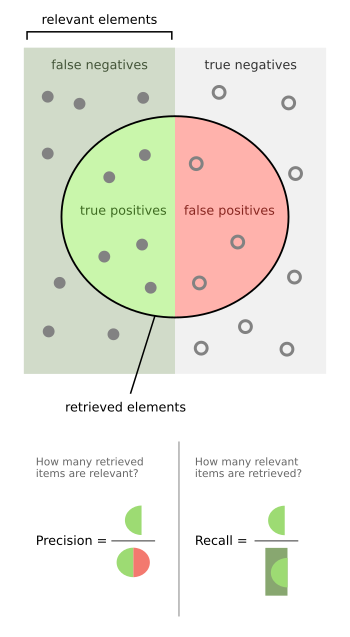

# **Getting Into Neural Nets**
- Let's see If we can get more acuracy or no?


In [56]:
import tensorflow as tf

In [57]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Plot loss
    ax1.plot(history.history['loss'], label='Train Loss')
    ax1.plot(history.history['val_loss'], label='Val Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.legend()  # Add legend for loss plot
    ax1.grid(True)

    # Plot accuracy
    ax2.plot(history.history['accuracy'], label='Train Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Val Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()  # Add legend for accuracy plot
    ax2.grid(True)

    plt.show()

In [58]:

def train_nn_model(num_nodes, dropout_prob, learning_rate, batch_size, epochs, X_train=xTrain, Y_train=yTrain, log=False):
    # Define the model architecture using Input layer
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(10,)),  # Specify input shape using Input layer

        tf.keras.layers.Dense(num_nodes, activation='relu'),       # 1st dense layer with N units and ReLU activation
        tf.keras.layers.Dropout(dropout_prob),  # Dropout layer to prevent overfitting

        tf.keras.layers.Dense(num_nodes, activation='relu'),       # 2nd dense layer with N units and ReLU activation
        tf.keras.layers.Dropout(dropout_prob),  # Dropout layer to prevent overfitting

        tf.keras.layers.Dense(1, activation='sigmoid')             # Output layer with sigmoid activation for binary classification
    ])

    # Compile the model
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # Train the model
    history = nn_model.fit(X_train, Y_train, epochs=epochs,
                           batch_size=batch_size, validation_split=0.2,
                           verbose=(0 if log == False else 1))

    return nn_model, history

Num Nodes: 16, Dropout: 0, Learning Rate: 0.1, Batch: 32


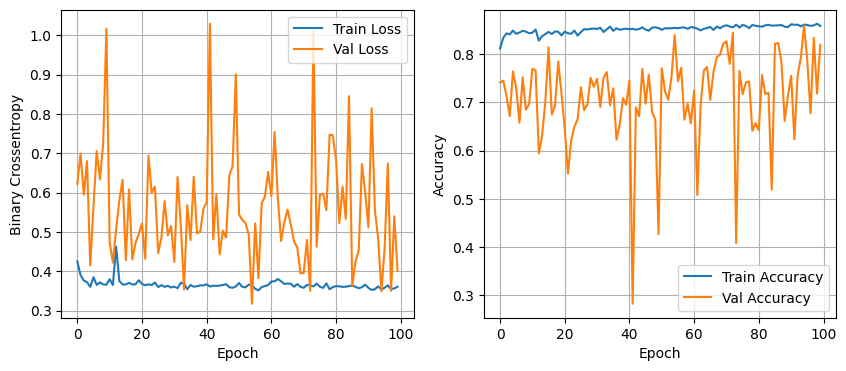

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8269 - loss: 0.3919
Num Nodes: 16, Dropout: 0, Learning Rate: 0.1, Batch: 64


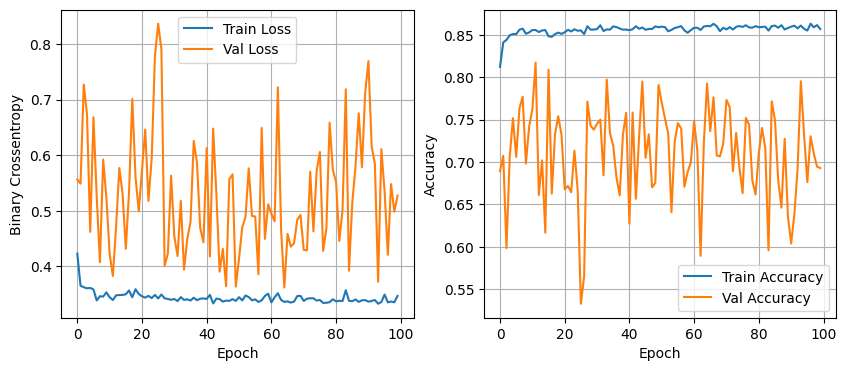

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8525 - loss: 0.3450
Num Nodes: 16, Dropout: 0, Learning Rate: 0.1, Batch: 128


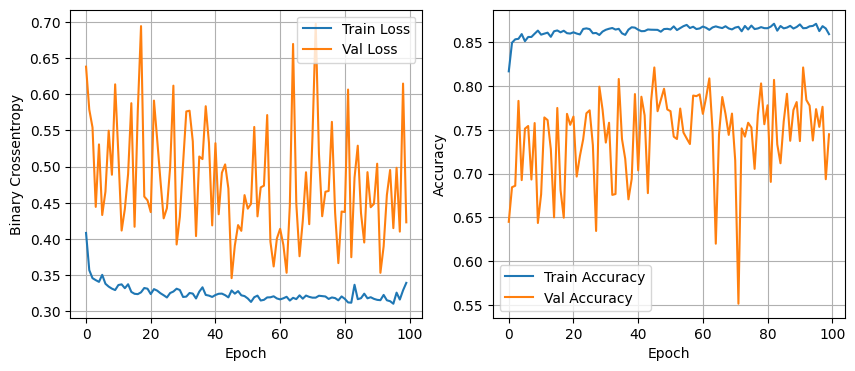

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8602 - loss: 0.3392
Num Nodes: 16, Dropout: 0, Learning Rate: 0.005, Batch: 32


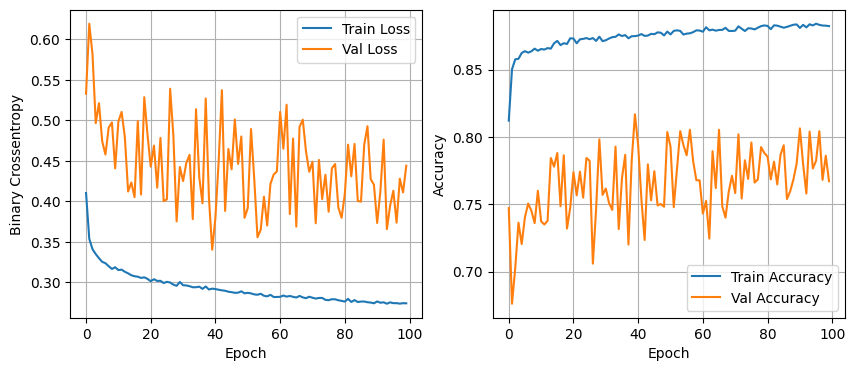

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8687 - loss: 0.3300
Num Nodes: 16, Dropout: 0, Learning Rate: 0.005, Batch: 64


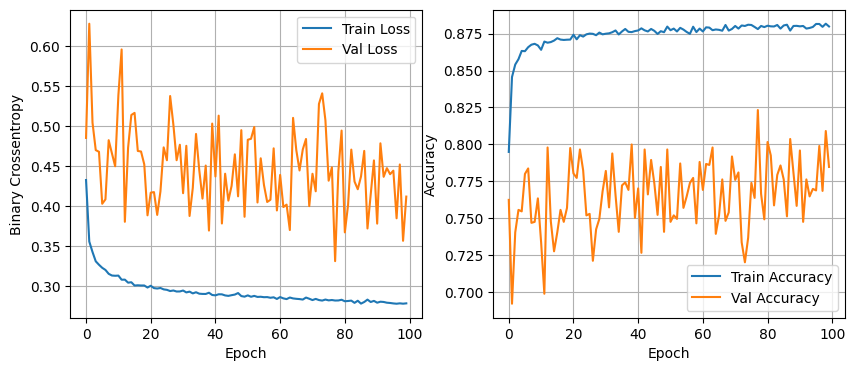

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8627 - loss: 0.3253
Num Nodes: 16, Dropout: 0, Learning Rate: 0.005, Batch: 128


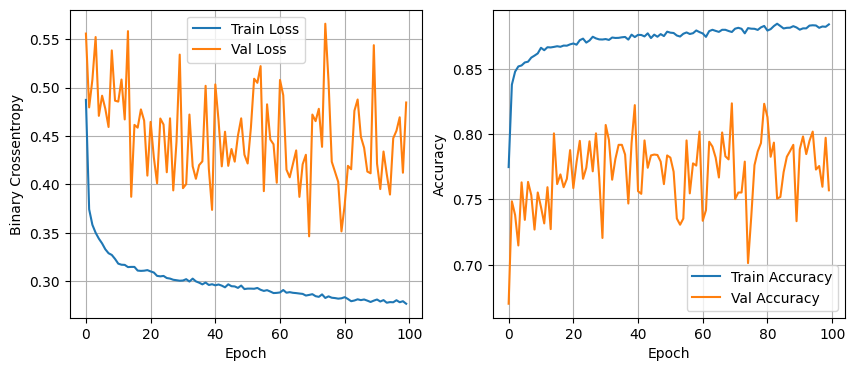

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8661 - loss: 0.3273
Num Nodes: 16, Dropout: 0, Learning Rate: 0.001, Batch: 32


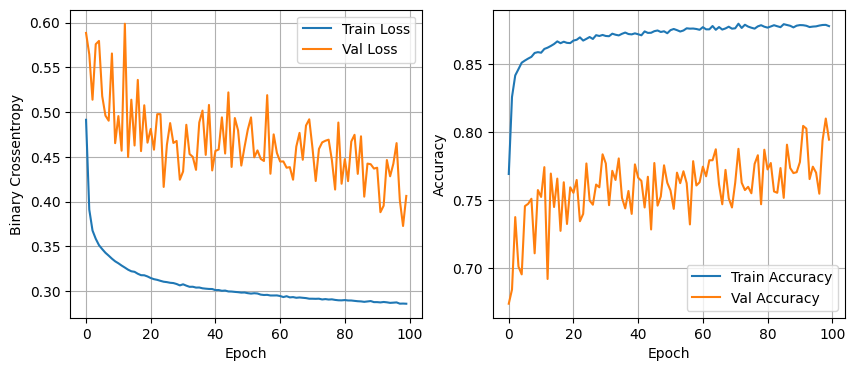

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8534 - loss: 0.3319
Num Nodes: 16, Dropout: 0, Learning Rate: 0.001, Batch: 64


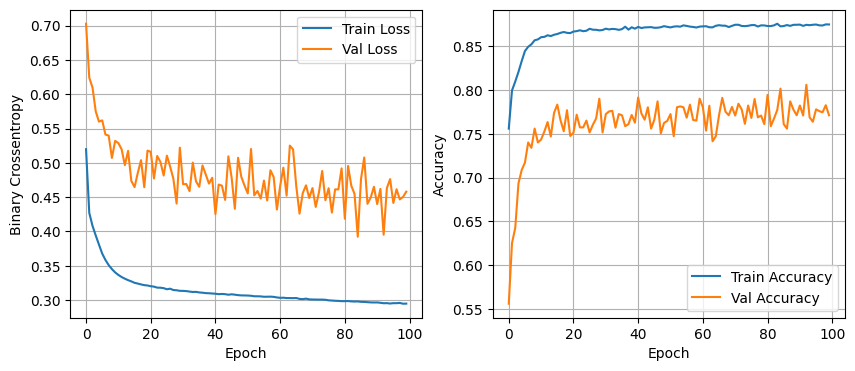

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8610 - loss: 0.3299
Num Nodes: 16, Dropout: 0, Learning Rate: 0.001, Batch: 128


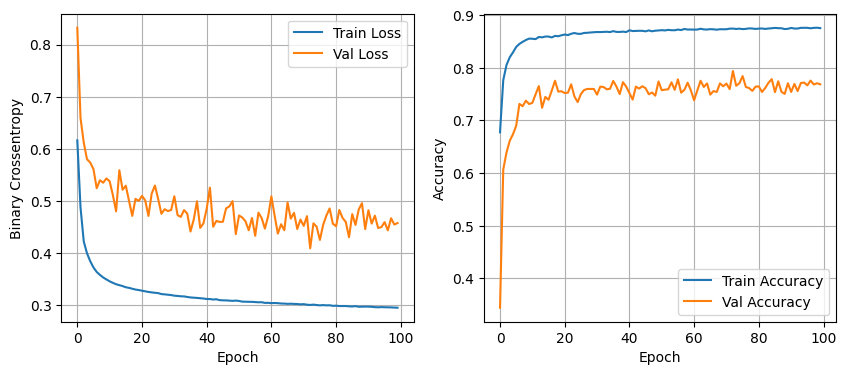

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8667 - loss: 0.3269
Num Nodes: 16, Dropout: 0.2, Learning Rate: 0.1, Batch: 32


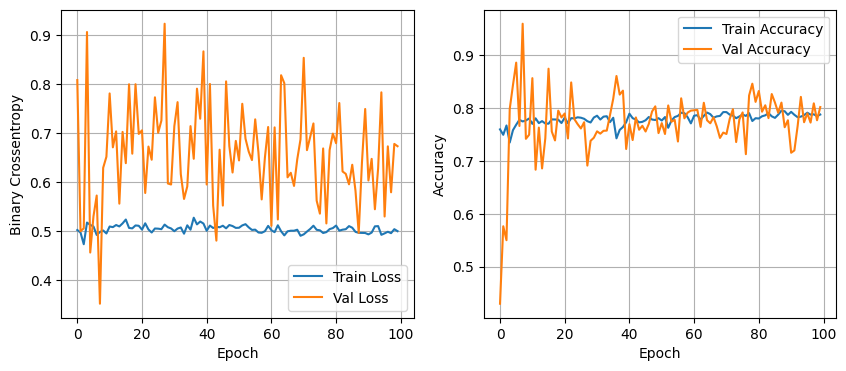

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7896 - loss: 0.4643
Num Nodes: 16, Dropout: 0.2, Learning Rate: 0.1, Batch: 64


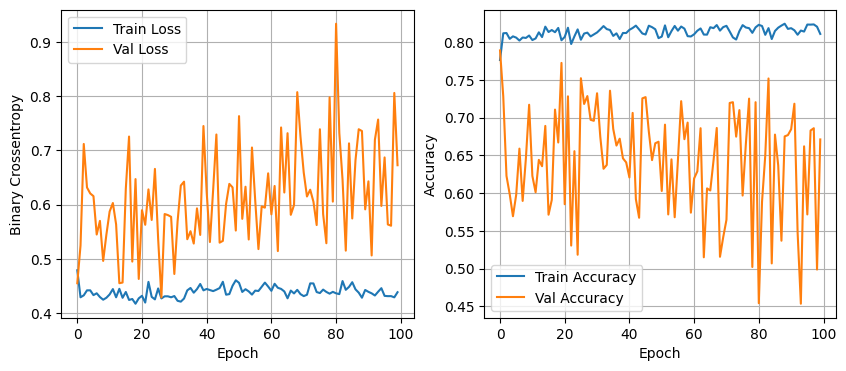

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8491 - loss: 0.4010
Num Nodes: 16, Dropout: 0.2, Learning Rate: 0.1, Batch: 128


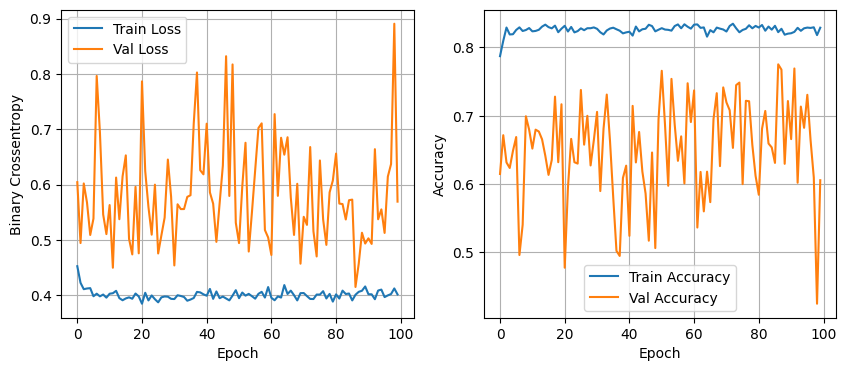

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8433 - loss: 0.3708
Num Nodes: 16, Dropout: 0.2, Learning Rate: 0.005, Batch: 32


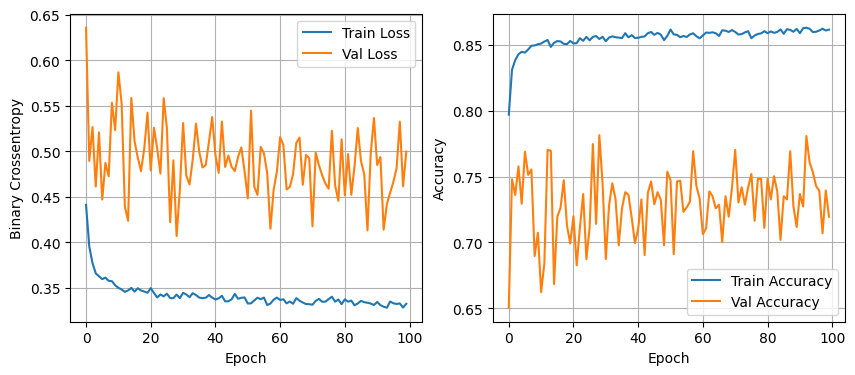

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8703 - loss: 0.3221
Num Nodes: 16, Dropout: 0.2, Learning Rate: 0.005, Batch: 64


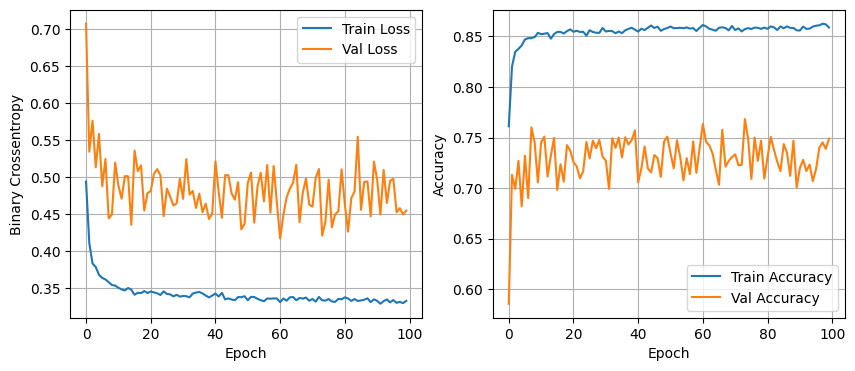

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8620 - loss: 0.3238
Num Nodes: 16, Dropout: 0.2, Learning Rate: 0.005, Batch: 128


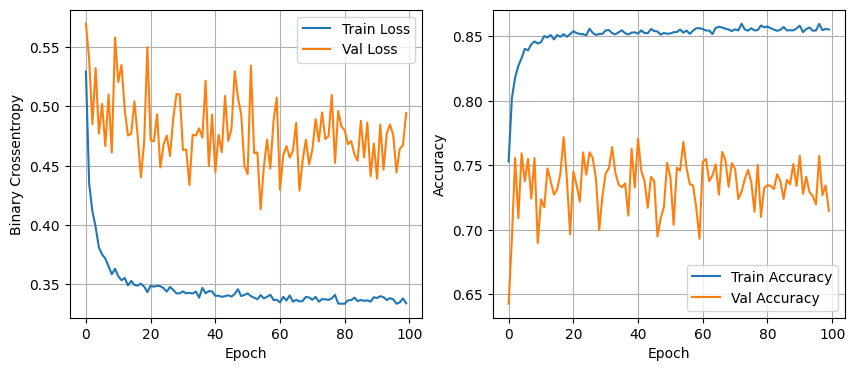

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8639 - loss: 0.3268
Num Nodes: 16, Dropout: 0.2, Learning Rate: 0.001, Batch: 32


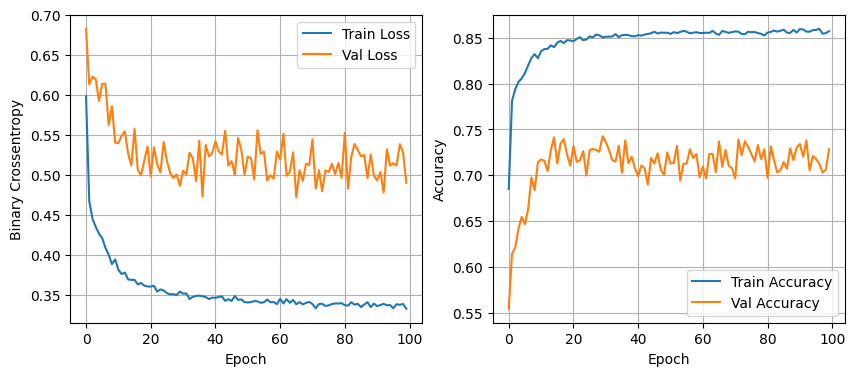

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8630 - loss: 0.3228
Num Nodes: 16, Dropout: 0.2, Learning Rate: 0.001, Batch: 64


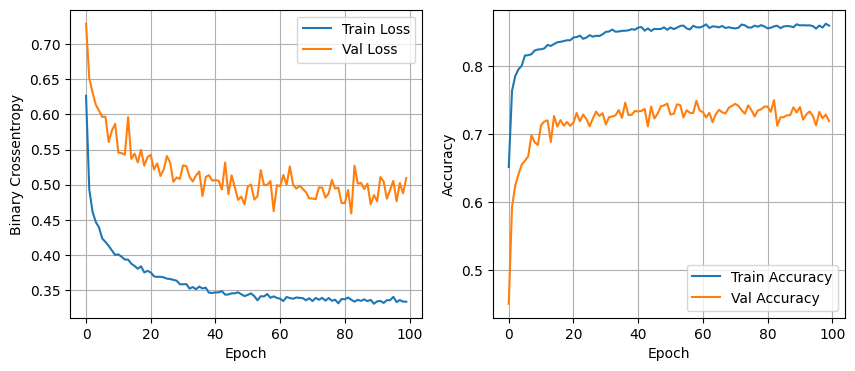

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8611 - loss: 0.3213
Num Nodes: 16, Dropout: 0.2, Learning Rate: 0.001, Batch: 128


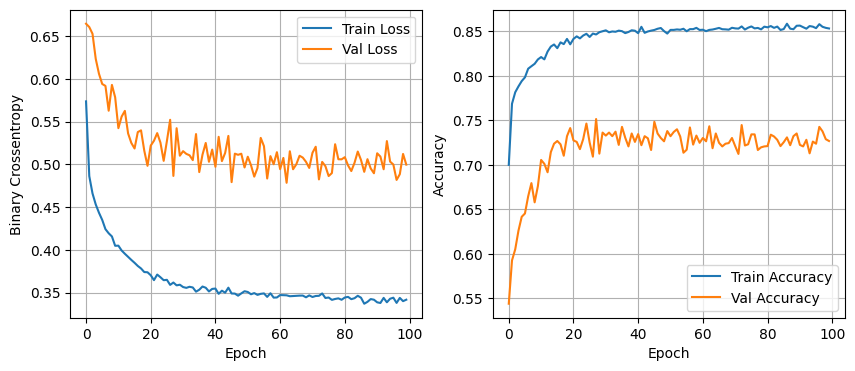

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8584 - loss: 0.3271
Num Nodes: 32, Dropout: 0, Learning Rate: 0.1, Batch: 32


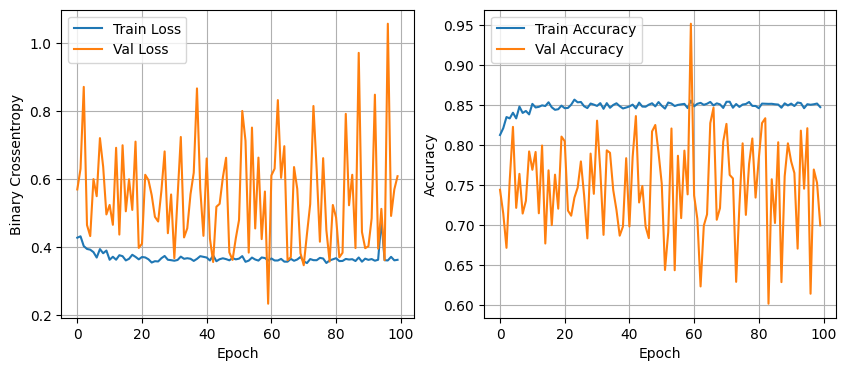

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8621 - loss: 0.3609
Num Nodes: 32, Dropout: 0, Learning Rate: 0.1, Batch: 64


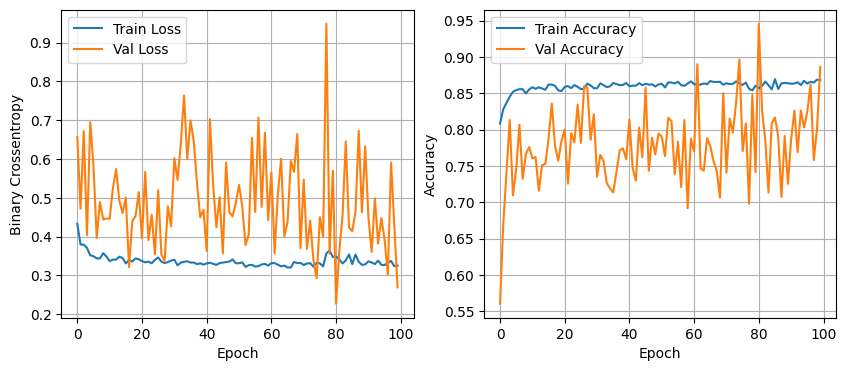

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8195 - loss: 0.3941
Num Nodes: 32, Dropout: 0, Learning Rate: 0.1, Batch: 128


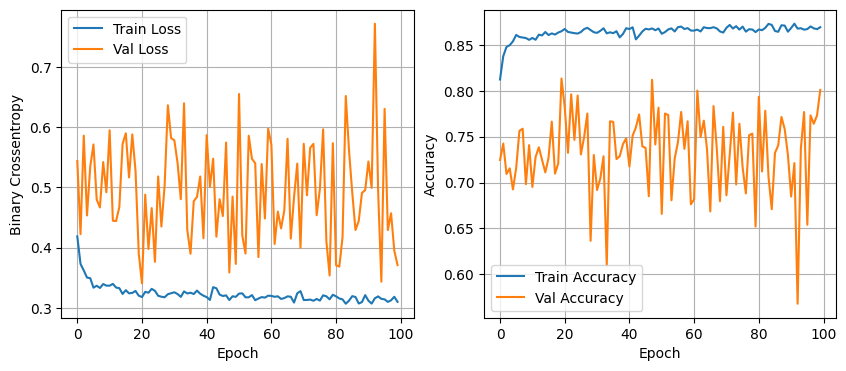

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8426 - loss: 0.3638
Num Nodes: 32, Dropout: 0, Learning Rate: 0.005, Batch: 32


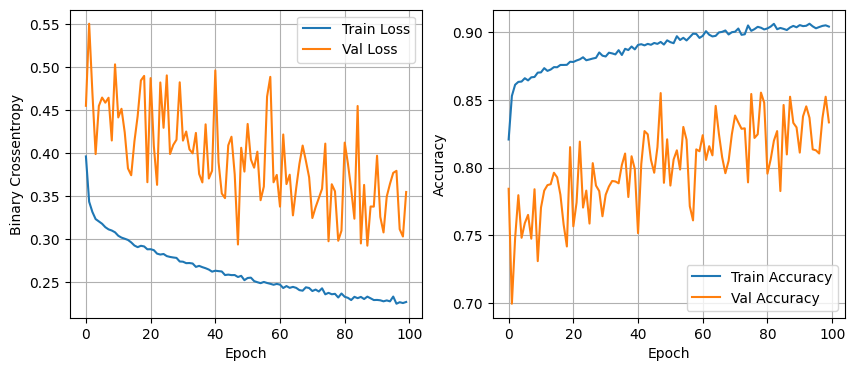

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8597 - loss: 0.3665
Num Nodes: 32, Dropout: 0, Learning Rate: 0.005, Batch: 64


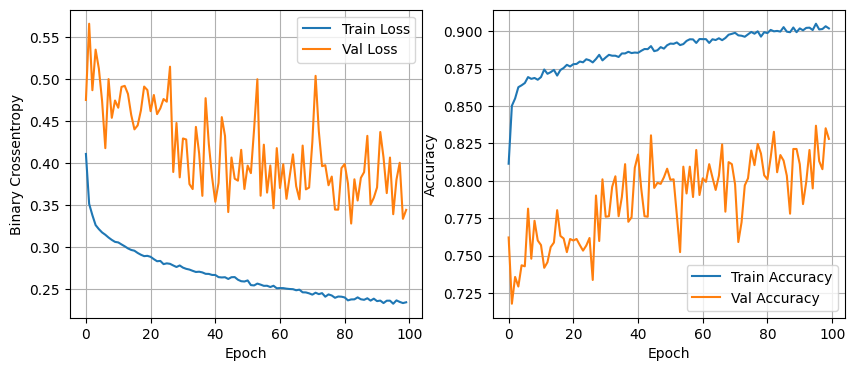

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8578 - loss: 0.3821
Num Nodes: 32, Dropout: 0, Learning Rate: 0.005, Batch: 128


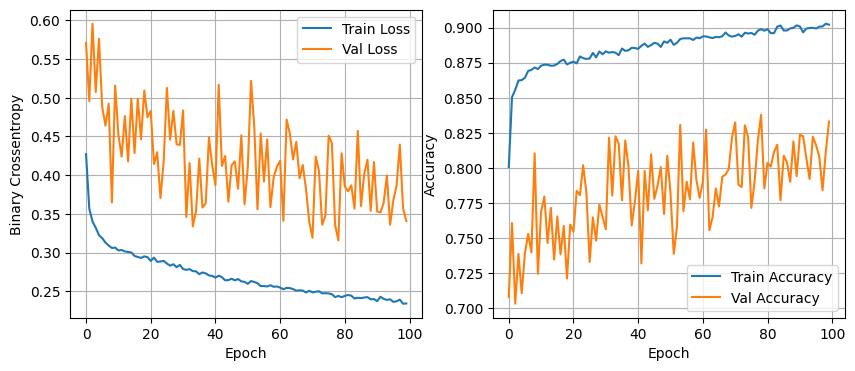

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8604 - loss: 0.3671
Num Nodes: 32, Dropout: 0, Learning Rate: 0.001, Batch: 32


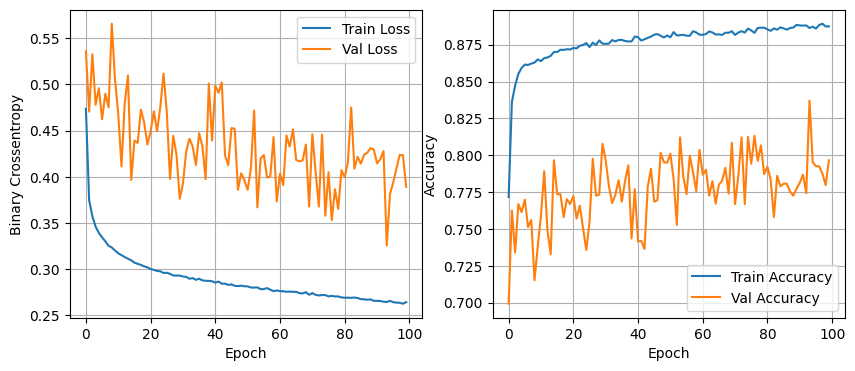

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8595 - loss: 0.3420
Num Nodes: 32, Dropout: 0, Learning Rate: 0.001, Batch: 64


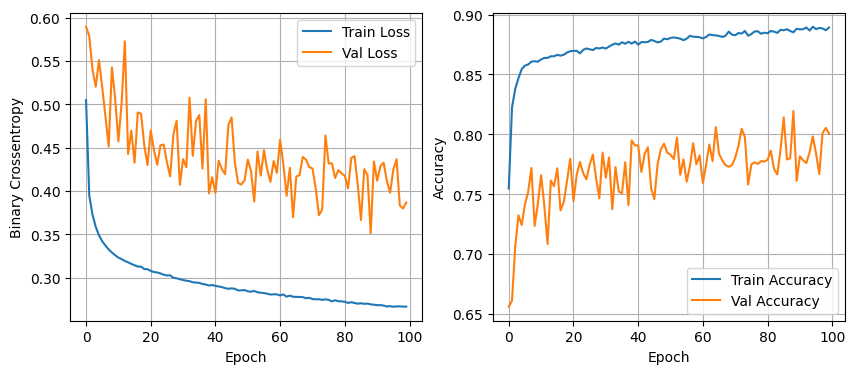

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8690 - loss: 0.3299
Num Nodes: 32, Dropout: 0, Learning Rate: 0.001, Batch: 128


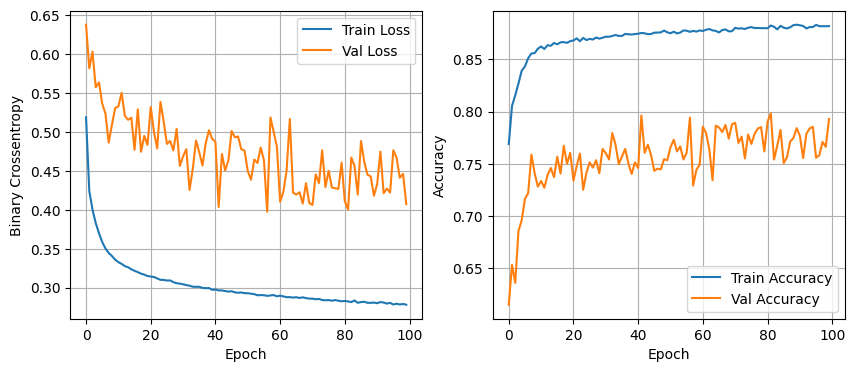

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8616 - loss: 0.3283
Num Nodes: 32, Dropout: 0.2, Learning Rate: 0.1, Batch: 32


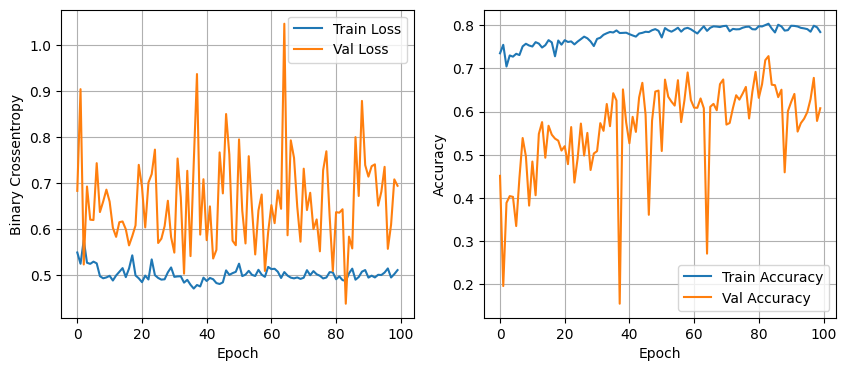

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8389 - loss: 0.4359
Num Nodes: 32, Dropout: 0.2, Learning Rate: 0.1, Batch: 64


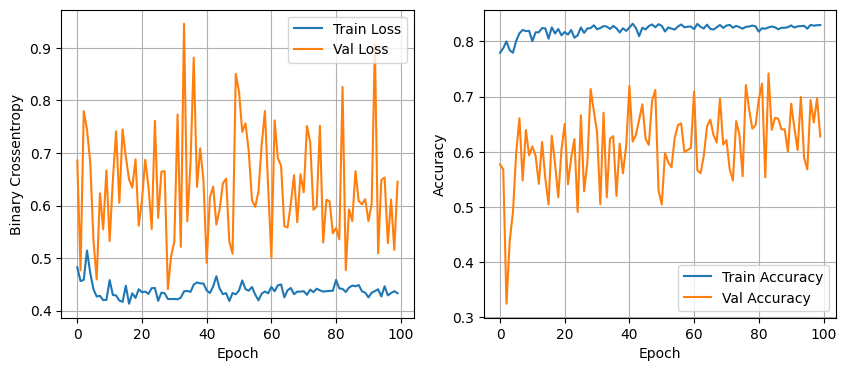

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8495 - loss: 0.3884
Num Nodes: 32, Dropout: 0.2, Learning Rate: 0.1, Batch: 128


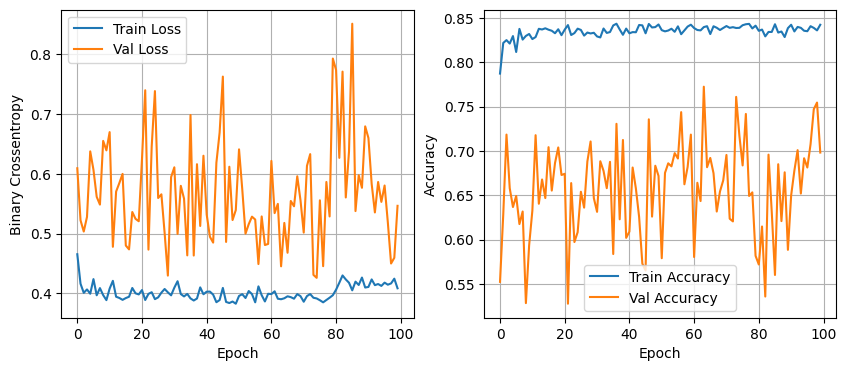

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8570 - loss: 0.3641
Num Nodes: 32, Dropout: 0.2, Learning Rate: 0.005, Batch: 32


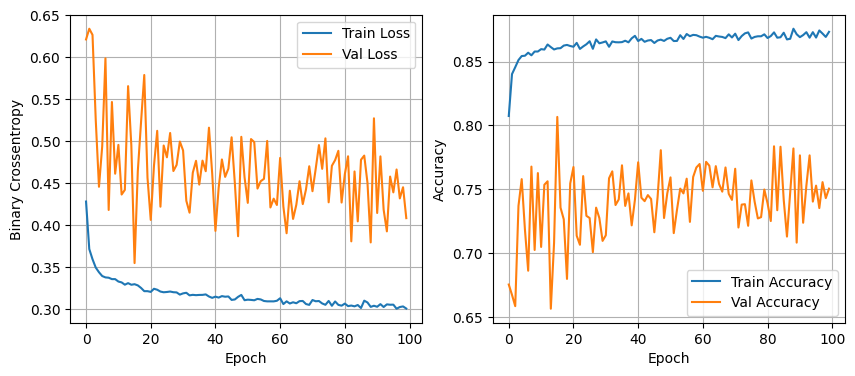

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8746 - loss: 0.3096
Num Nodes: 32, Dropout: 0.2, Learning Rate: 0.005, Batch: 64


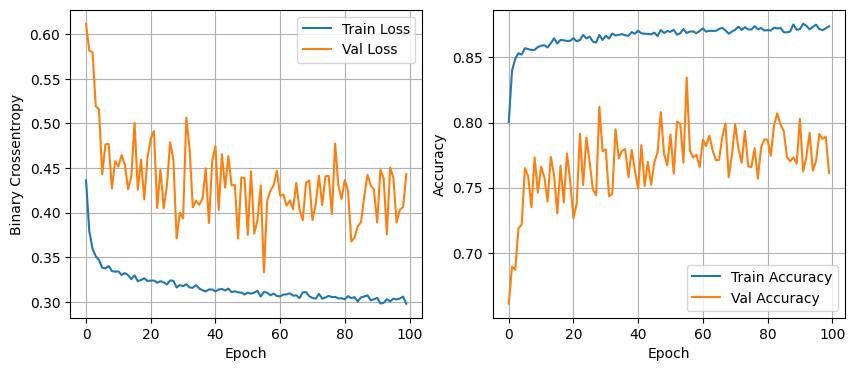

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3120
Num Nodes: 32, Dropout: 0.2, Learning Rate: 0.005, Batch: 128


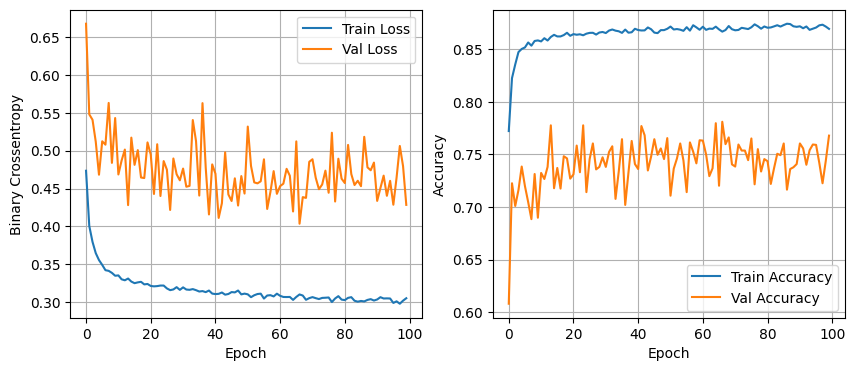

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8662 - loss: 0.3083
Num Nodes: 32, Dropout: 0.2, Learning Rate: 0.001, Batch: 32


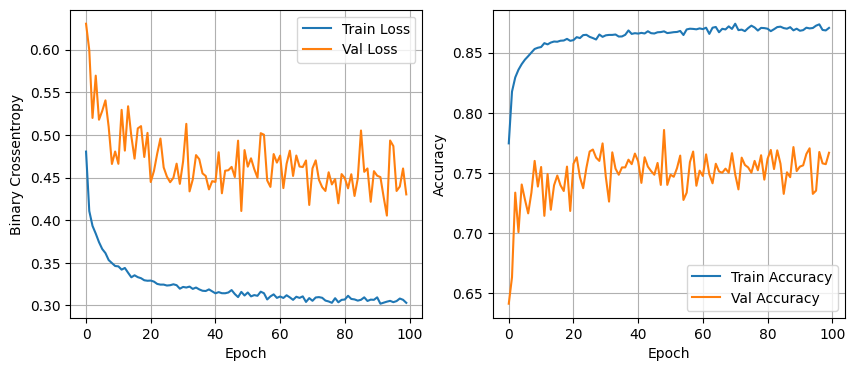

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8658 - loss: 0.3160
Num Nodes: 32, Dropout: 0.2, Learning Rate: 0.001, Batch: 64


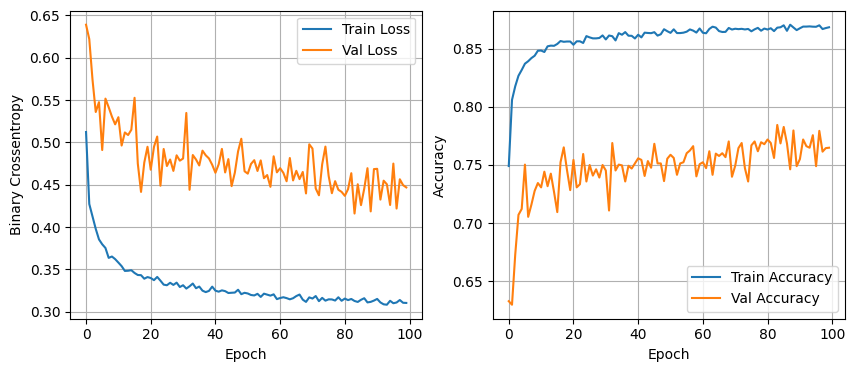

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8674 - loss: 0.3137
Num Nodes: 32, Dropout: 0.2, Learning Rate: 0.001, Batch: 128


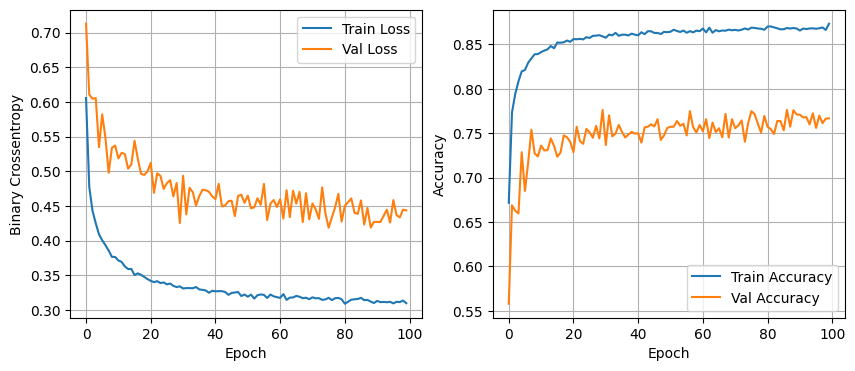

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8621 - loss: 0.3190
Num Nodes: 64, Dropout: 0, Learning Rate: 0.1, Batch: 32


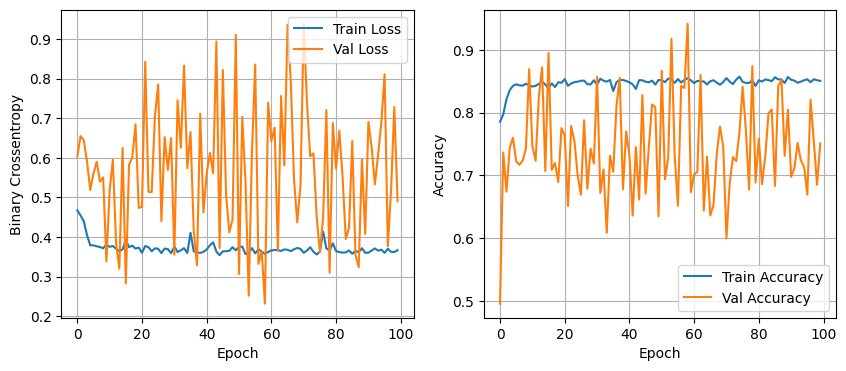

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.3620
Num Nodes: 64, Dropout: 0, Learning Rate: 0.1, Batch: 64


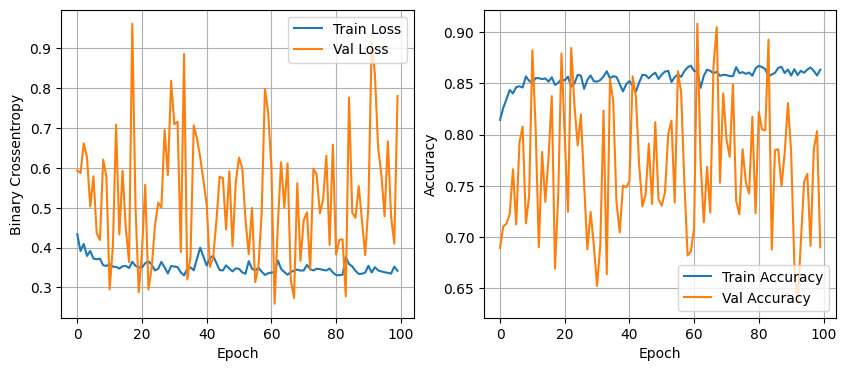

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8628 - loss: 0.3927
Num Nodes: 64, Dropout: 0, Learning Rate: 0.1, Batch: 128


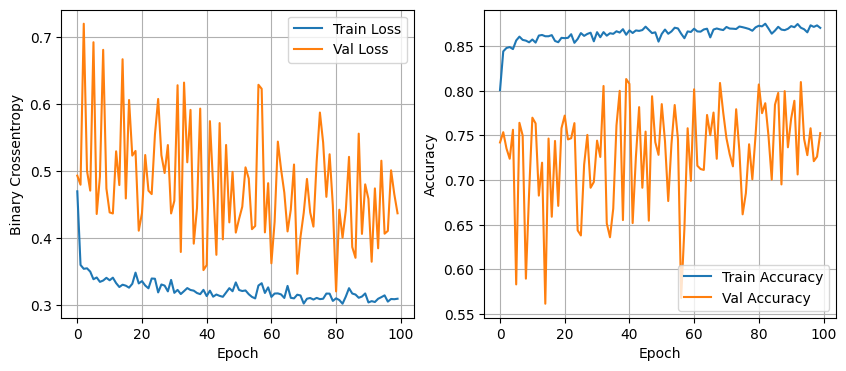

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8579 - loss: 0.3374
Num Nodes: 64, Dropout: 0, Learning Rate: 0.005, Batch: 32


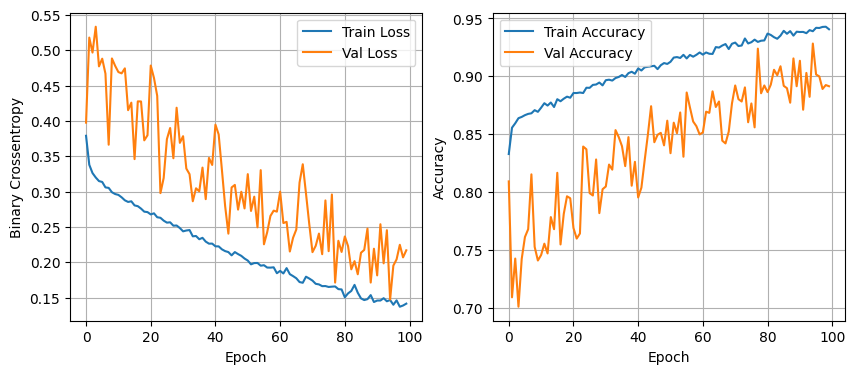

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8474 - loss: 0.6439
Num Nodes: 64, Dropout: 0, Learning Rate: 0.005, Batch: 64


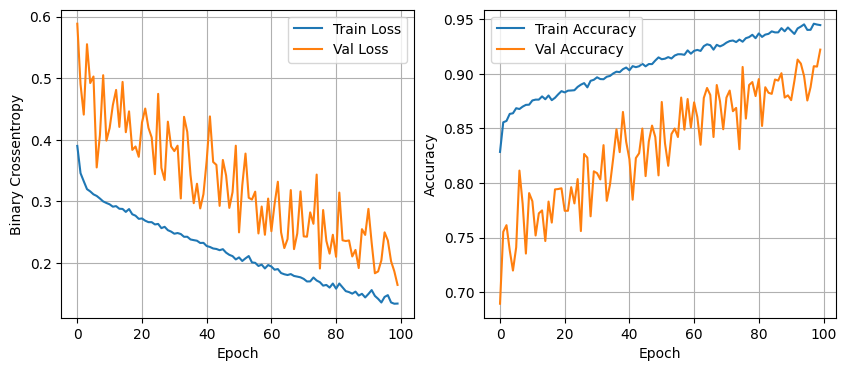

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8347 - loss: 0.6886
Num Nodes: 64, Dropout: 0, Learning Rate: 0.005, Batch: 128


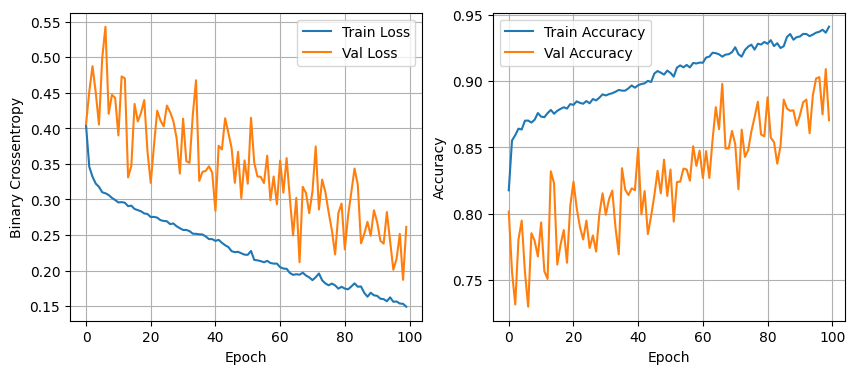

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8510 - loss: 0.5450
Num Nodes: 64, Dropout: 0, Learning Rate: 0.001, Batch: 32


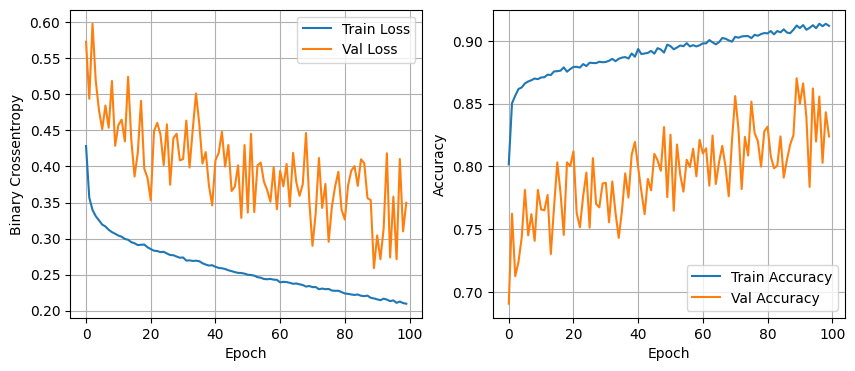

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8609 - loss: 0.3572
Num Nodes: 64, Dropout: 0, Learning Rate: 0.001, Batch: 64


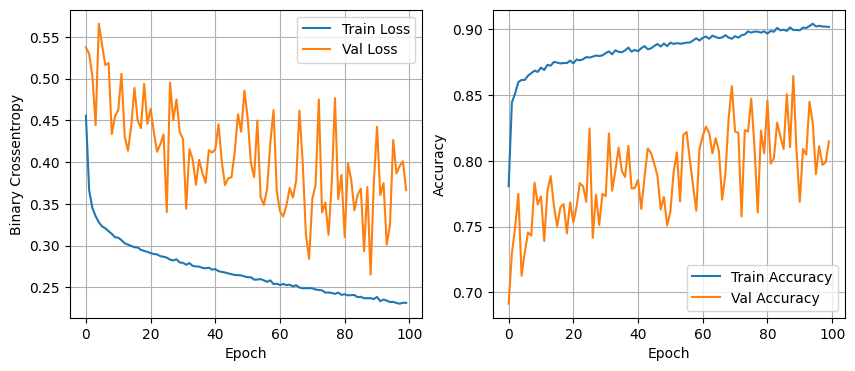

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8684 - loss: 0.3315
Num Nodes: 64, Dropout: 0, Learning Rate: 0.001, Batch: 128


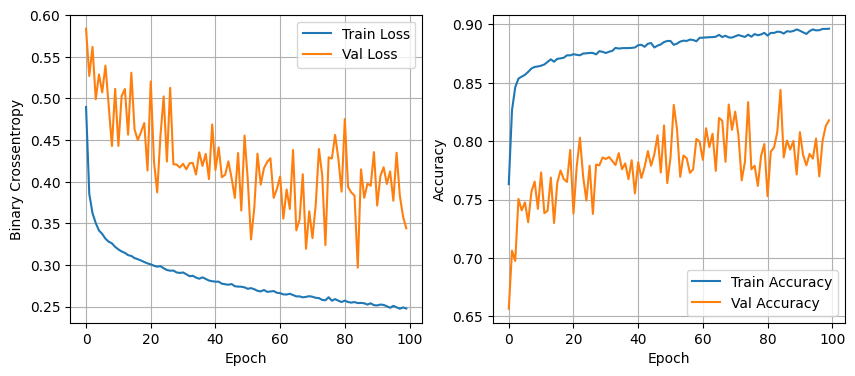

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8546 - loss: 0.3328
Num Nodes: 64, Dropout: 0.2, Learning Rate: 0.1, Batch: 32


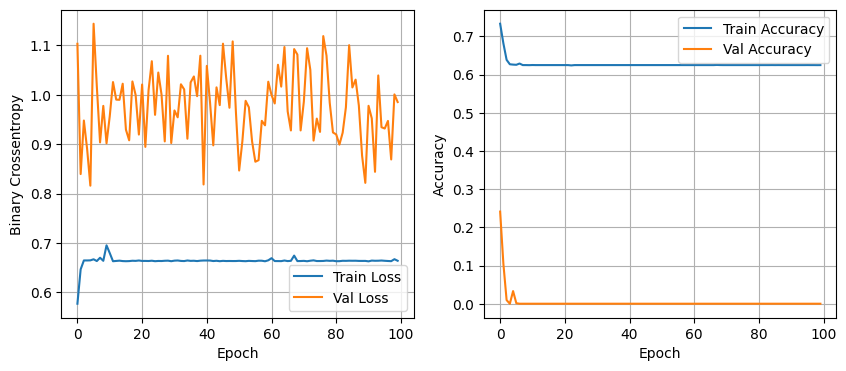

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6449 - loss: 0.6513
Num Nodes: 64, Dropout: 0.2, Learning Rate: 0.1, Batch: 64


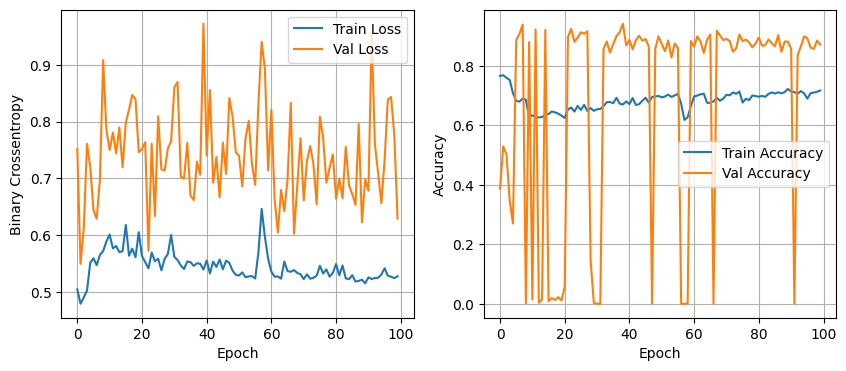

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7845 - loss: 0.4817
Num Nodes: 64, Dropout: 0.2, Learning Rate: 0.1, Batch: 128


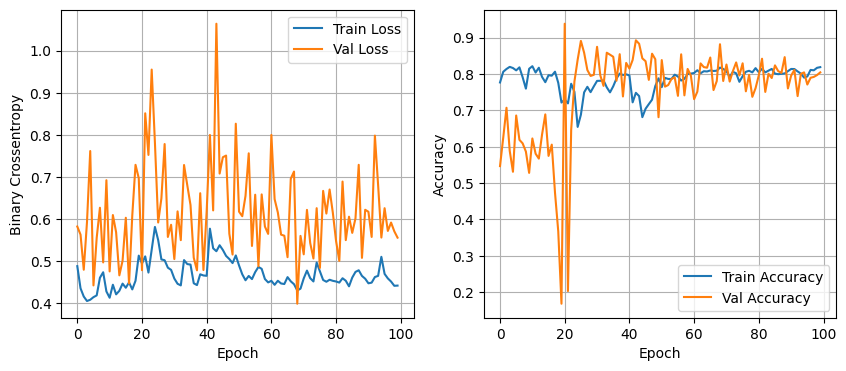

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8385 - loss: 0.4073
Num Nodes: 64, Dropout: 0.2, Learning Rate: 0.005, Batch: 32


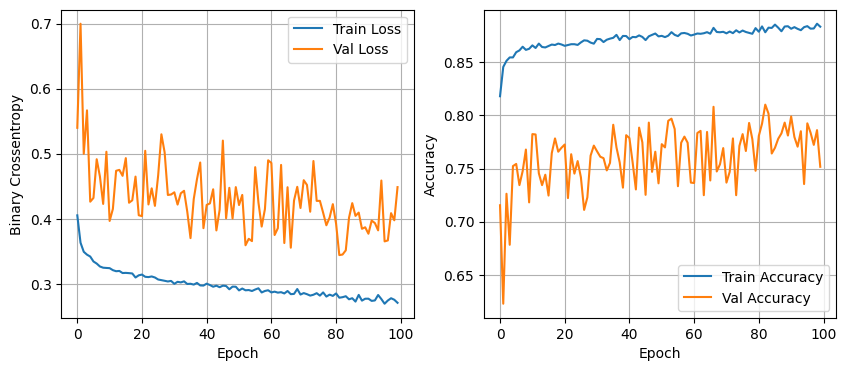

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8725 - loss: 0.3188
Num Nodes: 64, Dropout: 0.2, Learning Rate: 0.005, Batch: 64


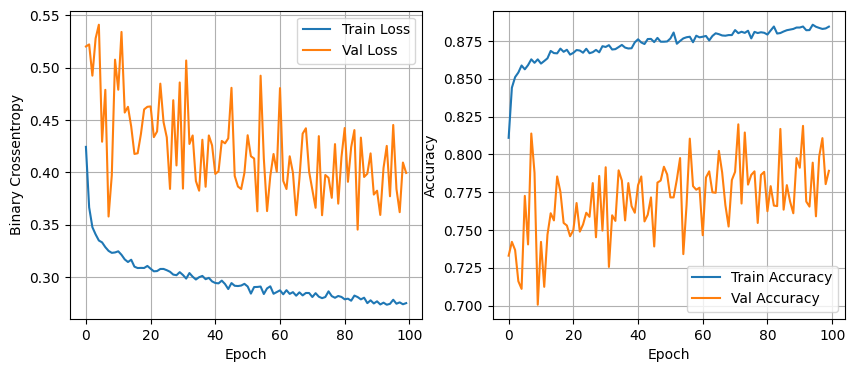

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8690 - loss: 0.3217
Num Nodes: 64, Dropout: 0.2, Learning Rate: 0.005, Batch: 128


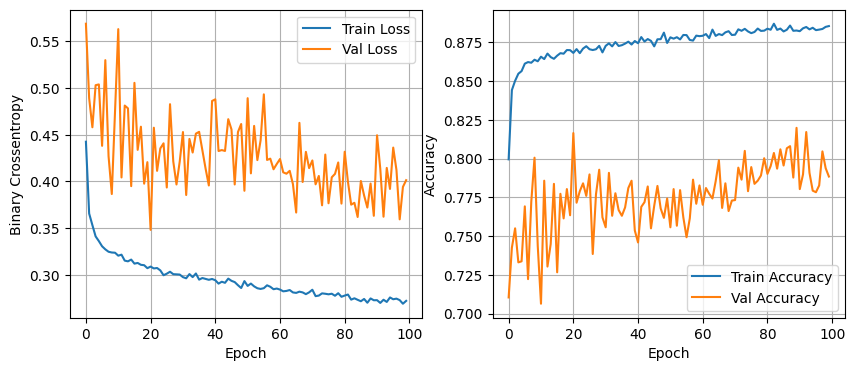

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8714 - loss: 0.3258
Num Nodes: 64, Dropout: 0.2, Learning Rate: 0.001, Batch: 32


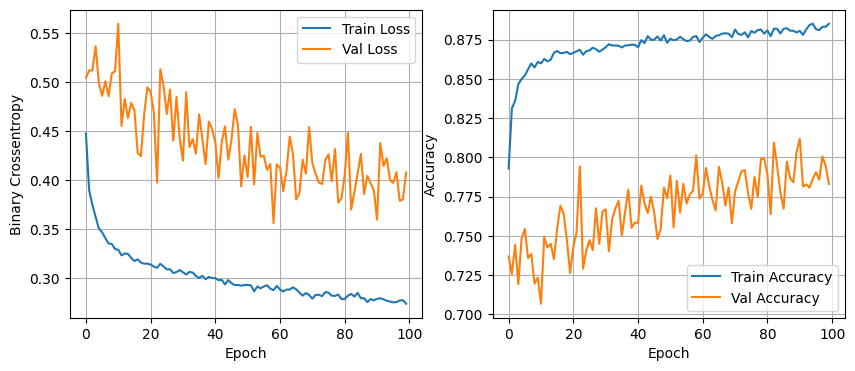

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8699 - loss: 0.3073
Num Nodes: 64, Dropout: 0.2, Learning Rate: 0.001, Batch: 64


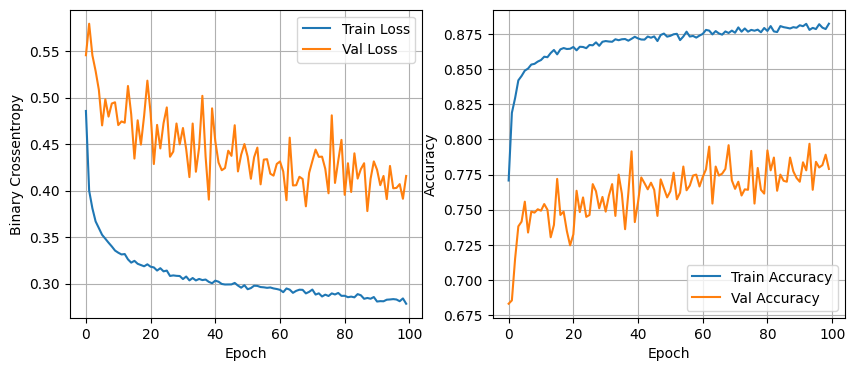

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8733 - loss: 0.3108
Num Nodes: 64, Dropout: 0.2, Learning Rate: 0.001, Batch: 128


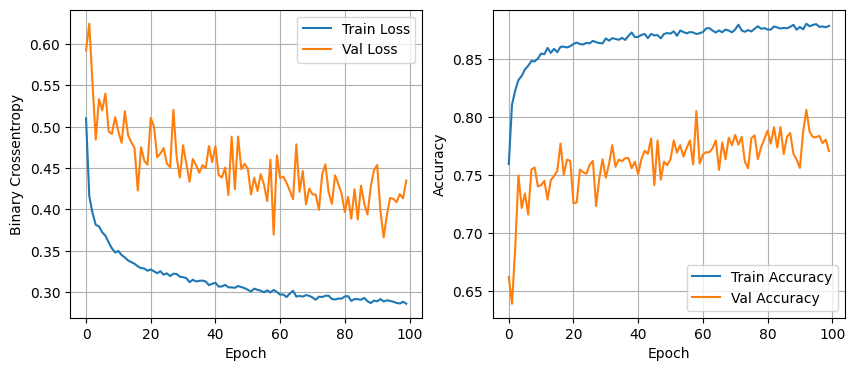

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8681 - loss: 0.3133


In [63]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.1, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        model, history = train_nn_model(num_nodes=num_nodes, dropout_prob=dropout_prob, learning_rate=lr, batch_size=batch_size, epochs=100)
        print(f"Num Nodes: {num_nodes}, Dropout: {dropout_prob}, Learning Rate: {lr}, Batch: {batch_size}")
        plot_history(history)

        val_loss = model.evaluate(xValid, yValid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [67]:
y_nn_pred = least_loss_model.predict(xTest)
y_nn_pred = (y_nn_pred > 0.5).astype(int).reshape(-1, )
y_nn_pred

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([0, 1, 1, ..., 1, 1, 1])

 ### **Neural Network Classification Report**

In [68]:
print(classification_report(yTest, y_nn_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1317
           1       0.88      0.94      0.91      2487

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

